## TRABAJO DE TITULACIÓN   - Grupo 8

 * Carlos Guzmán
 * Diego Salazar
 * Jonathan Barrionuevo
 * Nicole Molina

## FASE 1 - PREPARACIÓN DEL DATASET

Para este trabajo tenemos un Dataset de 1900 entradas, con varias características de ellas seleccionaremos las que se consideran relevantes para un estudio de clasificación (identificación de tendencias) siendo este el objetivo del proyecto final

### Carga del Dataset desde carpeta Dataset

In [3]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
dataset_path = '/workspace/Dataset/grupo8_dataset.csv'
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas para verificar la carga
df.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Fairbrass A.J.; O’Sullivan A.; Campbell J.; Ek...,"Fairbrass, A.J. (47060944600); O’Sullivan, A. ...",47060944600; 59013830500; 57211325039; 7004909341,The SDGs Provide Limited Evidence That Environ...,2024,Earth's Future,12,5,e2024EF004451,NaN,...,NaN,NaN,NaN,English,Earth's Futur.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85192085426
1,Wang X.; Xiong J.; Wang J.; Liu M.; Zhang J.,"Wang, Xinbin (57345638600); Xiong, Jianxin (49...",57345638600; 49362372300; 58164251700; 5880638...,Spatiotemporal evolution and driving factors o...,2024,Ecological Informatics,80,NaN,102459,NaN,...,NaN,NaN,NaN,English,Ecol. Informatics,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85182008582
2,Wang J.; Yi L.; Chen L.; Hou Y.; Zhang Q.; Yan...,"Wang, Jiayuan (58166891700); Yi, Lin (36520066...",58166891700; 36520066100; 57199842995; 5911691...,"Coupling and Coordination between Tourism, the...",2024,Sustainability (Switzerland),16,9,3657,NaN,...,NaN,NaN,NaN,English,Sustainability,Article,Final,NaN,Scopus,2-s2.0-85192787015
3,Meng L.; Yan F.; Fang Q.; Si W.,"Meng, Lin (57880239400); Yan, Fengjuan (591710...",57880239400; 59171037200; 59170186200; 5779327...,Research on the Educational Tourism Developmen...,2024,Sustainability (Switzerland),16,11,4647,NaN,...,NaN,NaN,NaN,English,Sustainability,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195834842
4,Chen Z.; Ye C.; Yang H.; Ye P.; Xie Y.; Ding Z.,"Chen, Zhengyan (58817236900); Ye, Cuicui (5913...",58817236900; 59136601200; 57929161700; 5913577...,Exploring the impact of seasonal forest landsc...,2024,Ecological Indicators,163,NaN,112115,NaN,...,NaN,NaN,NaN,English,Ecol. Indic.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85193709855


### Limpieza de Datos

Se debe realizar una limpieza de los datos, dado que gran parte de ellos no presentan relevancia para el análisis que debemos realizar, para ello nos quedaremos únicamente con las columnas:
* Author(s) ID
* Title
* Year
* Abstract
* Author Keywords
* Index Keywords
* Language of Original Document
* Document Type

In [4]:
# Seleccionar solo las columnas necesarias
df_cleaned = df[['Author(s) ID', 'Title', 'Year', 'Abstract', 'Author Keywords', 'Index Keywords', 'Language of Original Document', 'Document Type']]

# Mostrar las primeras 5 filas del DataFrame limpiado
df_cleaned.head()

,Author(s) ID,Title,Year,Abstract,Author Keywords,Index Keywords,Language of Original Document,Document Type
0,47060944600; 59013830500; 57211325039; 7004909341,The SDGs Provide Limited Evidence That Environ...,2024,"The Sustainable Development Goals (SDGs), aimi...",biodiversity; environment; human; indicators; ...,biodiversity; bioindicator; ecosystem health; ...,English,Article
1,57345638600; 49362372300; 58164251700; 5880638...,Spatiotemporal evolution and driving factors o...,2024,Tourism ecological adaptation (TEA) offers a n...,Dongting Lake area; Driving factors; Spatiotem...,China; Dongting Lake; Hunan; environmental imp...,English,Article
2,58166891700; 36520066100; 57199842995; 5911691...,"Coupling and Coordination between Tourism, the...",2024,"Studying the relationships among tourism, the ...",carbon emissions; coupling coordination; susta...,China; Lhasa; Qinghai-Xizang Plateau; Xizang; ...,English,Article
3,57880239400; 59171037200; 59170186200; 5779327...,Research on the Educational Tourism Developmen...,2024,Combining the Intangible Cultural Heritage and...,China; development suitability evaluation; edu...,China; Shandong; cultural heritage; factor ana...,English,Article
4,58817236900; 59136601200; 57929161700; 5913577...,Exploring the impact of seasonal forest landsc...,2024,This study investigates the emotional changes ...,Forest landscape; Machine learning; National f...,Forestry; Semantics; Sentiment analysis; Susta...,English,Article


Una vez hemos limpiado el Dataset, deberemos proceder con la reducción de dimensionalidad de la columnas de Keywords.

La razón por la que unificamos las columnas 'Author Keywords' y 'Index Keywords' en una sola columna de 'Keywords' es para:

* Eliminar redundancias: Tener dos columnas separadas para las palabras clave puede generar duplicación innecesaria de información. Al unificar ambas columnas y eliminar los duplicados, reducimos la dimensionalidad del dataset sin perder información valiosa.

* Simplificar el análisis: Al consolidar las palabras clave en una sola columna, el análisis posterior y el preprocesamiento se vuelven más manejables, ya que los modelos de machine learning pueden trabajar más fácilmente con una única fuente de palabras clave.

* Mejora de la representación de los datos: Esta fusión proporciona una representación más precisa de las palabras clave asociadas a cada documento, evitando posibles confusiones o inconsistencias en el análisis.

In [5]:
# Crear una copia del DataFrame original
df_cleaned = df_cleaned.copy()

# Rellenar valores nulos de 'Author Keywords' e 'Index Keywords'
df_cleaned['Author Keywords'] = df_cleaned['Author Keywords'].fillna('')
df_cleaned['Index Keywords'] = df_cleaned['Index Keywords'].fillna('')

# Crear la nueva columna 'Keywords' sin valores duplicados y ordenada alfabéticamente
df_cleaned['Keywords'] = df_cleaned.apply(
    lambda row: ', '.join(sorted(set((row['Author Keywords'] + ', ' + row['Index Keywords']).split(', ')))), axis=1
)

# Seleccionar las columnas para el DataFrame reducido
df_reduced = df_cleaned[['Author(s) ID', 'Title', 'Year', 'Abstract', 'Keywords', 'Language of Original Document', 'Document Type']]

# Mostrar las primeras filas del DataFrame reducido
df_reduced.head()


,Author(s) ID,Title,Year,Abstract,Keywords,Language of Original Document,Document Type
0,47060944600; 59013830500; 57211325039; 7004909341,The SDGs Provide Limited Evidence That Environ...,2024,"The Sustainable Development Goals (SDGs), aimi...",biodiversity; bioindicator; ecosystem health; ...,English,Article
1,57345638600; 49362372300; 58164251700; 5880638...,Spatiotemporal evolution and driving factors o...,2024,Tourism ecological adaptation (TEA) offers a n...,China; Dongting Lake; Hunan; environmental imp...,English,Article
2,58166891700; 36520066100; 57199842995; 5911691...,"Coupling and Coordination between Tourism, the...",2024,"Studying the relationships among tourism, the ...",China; Lhasa; Qinghai-Xizang Plateau; Xizang; ...,English,Article
3,57880239400; 59171037200; 59170186200; 5779327...,Research on the Educational Tourism Developmen...,2024,Combining the Intangible Cultural Heritage and...,China; Shandong; cultural heritage; factor ana...,English,Article
4,58817236900; 59136601200; 57929161700; 5913577...,Exploring the impact of seasonal forest landsc...,2024,This study investigates the emotional changes ...,Forest landscape; Machine learning; National f...,English,Article


#### Tratamiento de datos Nulos

In [6]:
# Calcular los valores nulos por columna
nulos_por_columna = df_reduced.isnull().sum()

# Crear un DataFrame para mostrar los valores nulos
nulos_df = pd.DataFrame({
    'Column': nulos_por_columna.index,
    'Null Values': nulos_por_columna.values
})

# Mostrar el DataFrame de valores nulos
nulos_df

,Column,Null Values
0,Author(s) ID,31
1,Title,0
2,Year,0
3,Abstract,0
4,Keywords,0
5,Language of Original Document,0
6,Document Type,0


Verificamos que tenemos 31 artículos sin ID de autor, por lo cuál se realiza el tratamiento de estos con la etiqueta noID

In [7]:
df_reduced.loc[:, 'Author(s) ID'] = df_reduced['Author(s) ID'].fillna('NoID')

# Verificar que los valores nulos se han reemplazado correctamente
print(df_reduced.isnull().sum())

Author(s) ID                     0
Title                            0
Year                             0
Abstract                         0
Keywords                         0
Language of Original Document    0
Document Type                    0
dtype: int64


## FASE 2 - EXPLORACIÓN INICIAL



En esta sección, realizaremos una **exploración inicial** del dataset para entender mejor la distribución y las características de los datos antes de proceder con el preprocesamiento y la construcción del modelo de clasificación.

Este análisis incluye:

1. **Distribución de Artículos por Año**: Exploraremos la cantidad de artículos publicados en cada año para observar posibles patrones o incrementos en la producción académica sobre turismo.

2. **Distribución de la Cantidad de Palabras en los Abstracts**: Analizaremos la longitud de los abstracts en términos de cantidad de palabras. Esto es relevante para el modelo de RNN, ya que nos permitirá definir el tamaño de las secuencias de entrada.

3. **Distribución de Tipos de Documentos**: Observaremos los diferentes tipos de documentos en el dataset para identificar qué tipos predominan, lo cual puede ser útil en el análisis y filtrado de los datos.

4. **Distribución de Idiomas de los Documentos**: Verificaremos los idiomas en los que están escritos los artículos para asegurar que la mayoría esté en un idioma adecuado para el procesamiento (por ejemplo, inglés).

5. **Análisis de Frecuencia de Palabras Clave**: Realizaremos un análisis de las palabras clave más comunes para identificar los temas y términos más frecuentes en la investigación sobre turismo.

Estos gráficos y análisis nos proporcionarán una **visión general del dataset** y nos ayudarán a tomar decisiones informadas en los siguientes pasos de preprocesamiento y entrenamiento del modelo.


### Análisis 1: Distribución de artículos por año

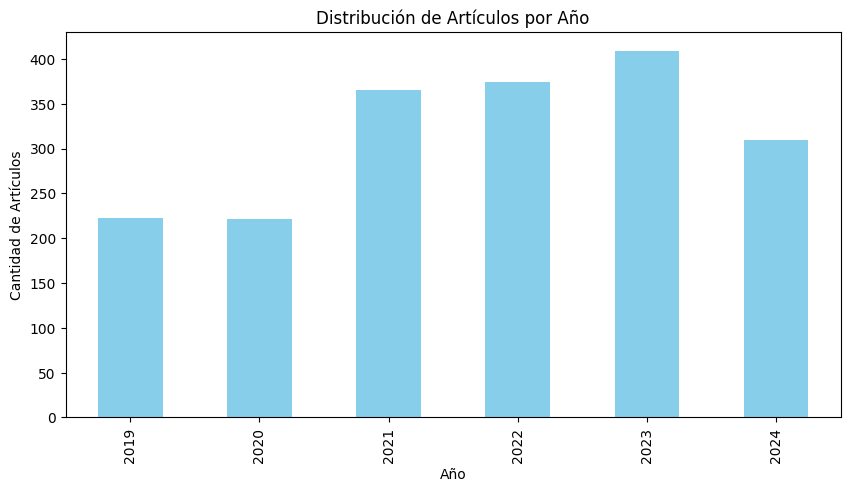

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_reduced['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Artículos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Artículos')
plt.show()

### Análisis 2: Distribución de longitud de abstracts

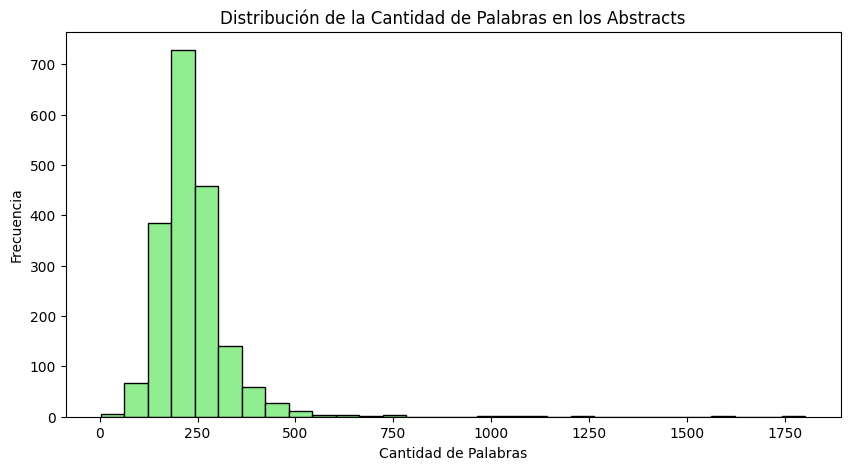

In [13]:
df_reduced.loc[:, 'Abstract Length'] = df_reduced['Abstract'].apply(lambda x: len(str(x).split()))

# Visualización
plt.figure(figsize=(10, 5))
df_reduced['Abstract Length'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la Cantidad de Palabras en los Abstracts')
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Frecuencia')
plt.show()

###  Análisis 3: Distribución de tipos de documentos

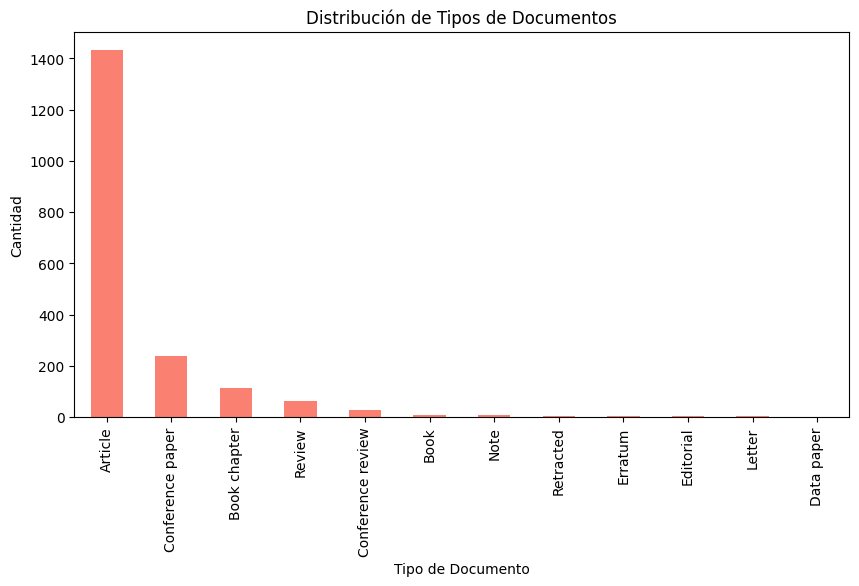

In [10]:
plt.figure(figsize=(10, 5))
df_reduced['Document Type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribución de Tipos de Documentos')
plt.xlabel('Tipo de Documento')
plt.ylabel('Cantidad')
plt.show()

### Análisis 4: Distribución de idiomas

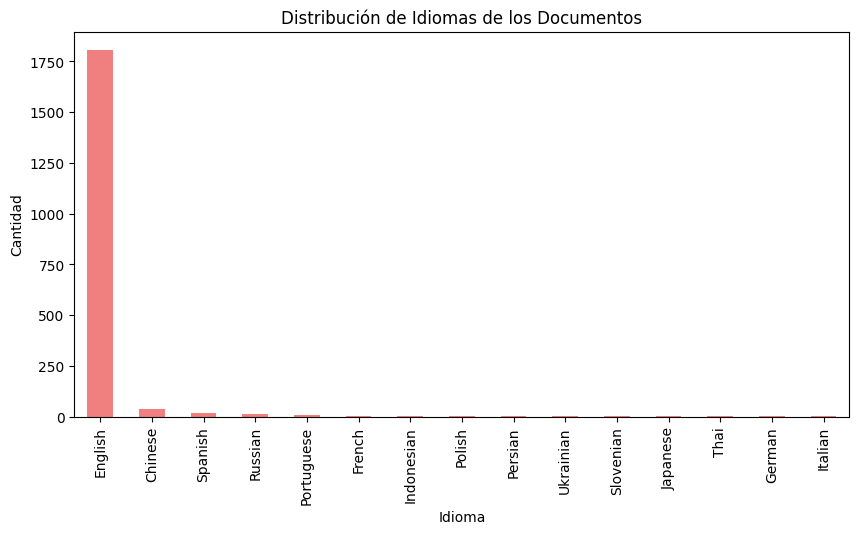

In [11]:
plt.figure(figsize=(10, 5))
df_reduced['Language of Original Document'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución de Idiomas de los Documentos')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.show()


### Análisis 5: Frecuencia de palabras clave

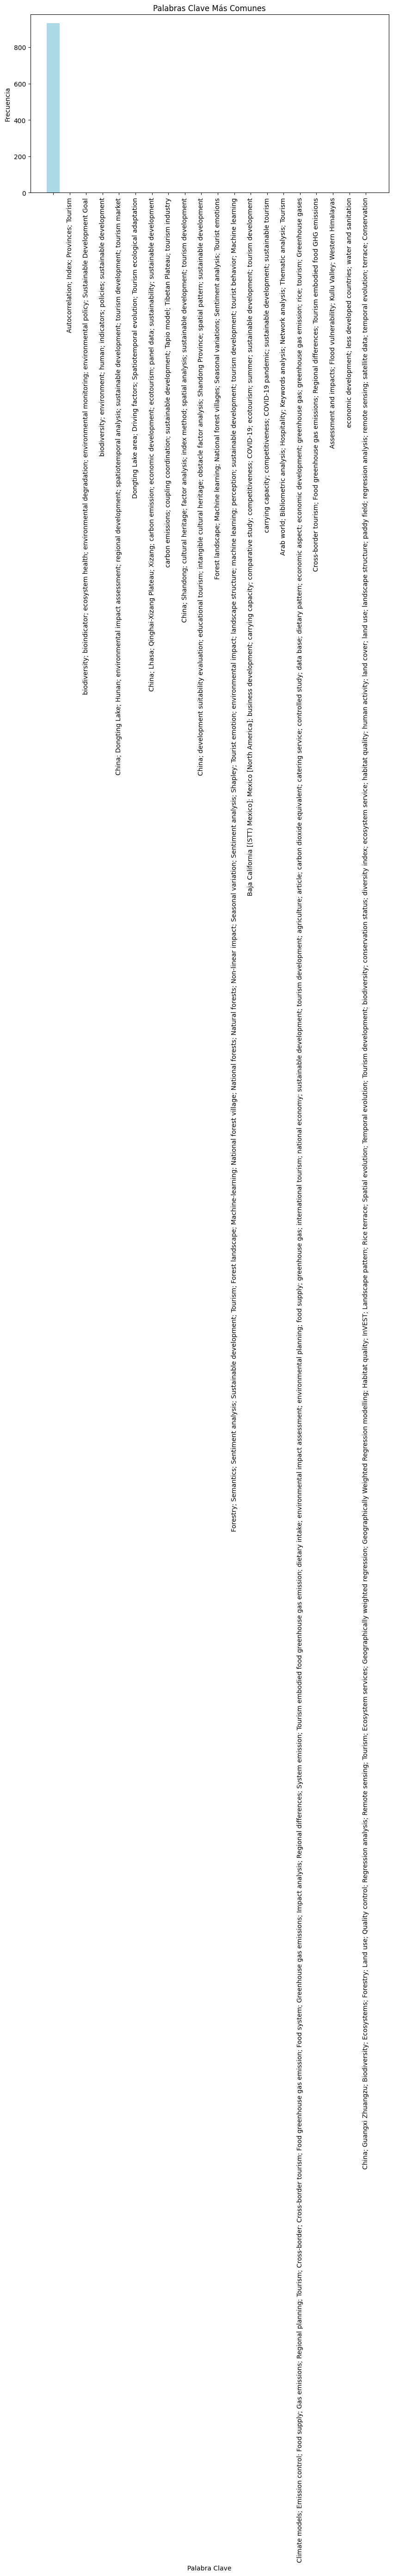

In [12]:
from collections import Counter
all_keywords = ', '.join(df_reduced['Keywords']).split(', ')
keyword_counts = Counter(all_keywords)
most_common_keywords = keyword_counts.most_common(20)  # Cambia el número para ver más o menos palabras

# Mostrar las palabras clave más comunes
keywords, counts = zip(*most_common_keywords)
plt.figure(figsize=(10, 5))
plt.bar(keywords, counts, color='lightblue')
plt.title('Palabras Clave Más Comunes')
plt.xlabel('Palabra Clave')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()